In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_json_contents = file_get_contents("./files_parseds/ALEXIS PEDRÃO_260001087378.json")
#file_json_contents = file_get_contents("./files_parseds/MÁRCIO MACEDO_260000958767.json")
#file_json_contents = file_get_contents("./files_parseds/ALMEIDA LIMA_260000935642.json")

## Tf-idf com 0
file_json_contents = file_get_contents("./files_parseds/EDVALDO_260000983413.json")
#file_json_contents = file_get_contents("./files_parseds/DELEGADA DANIELLE_260000637328.json")

json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [6]:
stop_words = ["de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    #max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)

In [71]:
# Analisar este caso para a exibição dos idfs 0
df = []
top_ten_sentences_per_page = []

for tf in tfIdf:
  frame = pd.DataFrame(tf.T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
  frame = frame.sort_values('TF-IDF', ascending=False)
  top_ten_sentences = frame.head(10)
  top_ten = pd.DataFrame()
  top_ten['Sentence'] = top_ten_sentences.index
  top_ten['TF-IDF'] = top_ten_sentences['TF-IDF'].tolist()
  top_ten_sentences_per_page.append(top_ten)
  df.append(frame)

print(len(top_ten_sentences_per_page))
print(top_ten_sentences_per_page)

48
[      Sentence  TF-IDF
0       acesso     0.0
1      ampliar     0.0
2     inovação     0.0
3  inteligente     0.0
4         meio     0.0
5    municipal     0.0
6     parceria     0.0
7      pessoas     0.0
8        plano     0.0
9    população     0.0,       Sentence    TF-IDF
0         vida  0.639653
1    qualidade  0.426435
2    população  0.385199
3  assistência  0.213218
4  inteligente  0.205778
5         foco  0.205778
6      avançar  0.192599
7       gestão  0.181183
8        áreas  0.181183
9     programa  0.166491,           Sentence    TF-IDF
0           gestão  0.551861
1         inovação  0.403955
2          avançar  0.391089
3  desenvolvimento  0.367908
4             vida  0.216478
5            plano  0.216478
6            áreas  0.183954
7           social  0.178691
8          pessoas  0.173730
9            ações  0.169037,           Sentence    TF-IDF
0          pessoas  0.425524
1         serviços  0.392751
2          aracaju  0.347343
3           acesso  0.300377
4

/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: 

In [102]:
sentences_tfidf_no_zero_dictionary = {}
text_database = []

for df_word in df:
    for sentence, row in df_word.iterrows():
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]

        if row["TF-IDF"] > 0:
            sentences_tfidf_no_zero_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_tfidf_no_zero_dictionary)
#print(text_database)

In [73]:
tfIdf.shape

(48, 48)

In [74]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,acesso,0.0
1,ampliar,0.0
2,inovação,0.0
3,inteligente,0.0
4,meio,0.0
...,...,...
2299,forma,0.0
2300,fortalecer,0.0
2301,gestão,0.0
2302,implantar,0.0


In [75]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.0447
Para k=3 o valor Silhoutte foi de 0.0466
Para k=4 o valor Silhoutte foi de 0.0357
Para k=5 o valor Silhoutte foi de 0.0573
Para k=6 o valor Silhoutte foi de 0.0218
Para k=7 o valor Silhoutte foi de 0.0490
Para k=8 o valor Silhoutte foi de 0.0500
Para k=9 o valor Silhoutte foi de 0.0561


In [76]:
km = KMeans(n_clusters=5,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([0, 1, 1, 1, 1, 3, 3, 1, 4, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       1, 0, 3, 0, 1, 0, 1, 1, 2, 0, 4, 4, 3, 0, 0, 0, 4, 1, 2, 2, 1, 1,
       0, 2, 0, 0], dtype=int32)

In [80]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts

,sentence,tf-idf,clusters_km
0,acesso,0.0,0.0
1,ampliar,0.0,1.0
2,inovação,0.0,1.0
3,inteligente,0.0,1.0
4,meio,0.0,1.0
...,...,...,...
2299,forma,0.0,NaN
2300,fortalecer,0.0,NaN
2301,gestão,0.0,NaN
2302,implantar,0.0,NaN


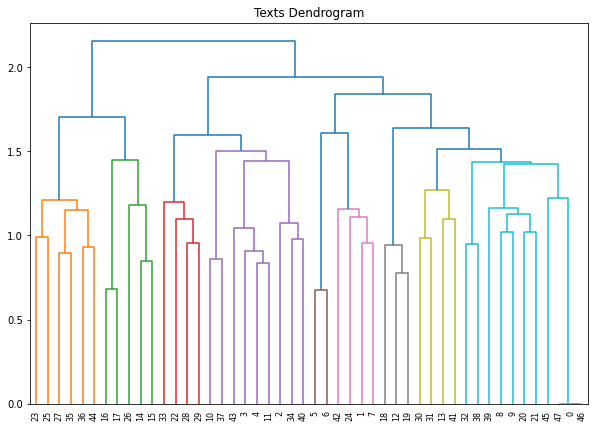

In [81]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)

In [82]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([1, 2, 0, 0, 0, 6, 6, 2, 1, 1, 0, 0, 5, 1, 3, 3, 3, 3, 5, 5, 1, 1,
       0, 4, 2, 4, 3, 4, 0, 0, 1, 1, 1, 0, 0, 4, 4, 0, 1, 1, 0, 1, 2, 0,
       4, 1, 1, 1])

In [83]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,0.0,1.0
1,ampliar,0.0,1.0,2.0
2,inovação,0.0,1.0,0.0
3,inteligente,0.0,1.0,0.0
4,meio,0.0,1.0,0.0
...,...,...,...,...
2299,forma,0.0,NaN,NaN
2300,fortalecer,0.0,NaN,NaN
2301,gestão,0.0,NaN,NaN
2302,implantar,0.0,NaN,NaN


In [84]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,0.0,1.0
1,ampliar,0.0,1.0,2.0
2,inovação,0.0,1.0,0.0
3,inteligente,0.0,1.0,0.0
4,meio,0.0,1.0,0.0
...,...,...,...,...
2299,forma,0.0,0.0,0.0
2300,fortalecer,0.0,0.0,0.0
2301,gestão,0.0,0.0,0.0
2302,implantar,0.0,0.0,0.0


In [106]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[41, 21, 35, 34,  8, 24,  9, 30,  5, 22, 33,  1,  6, 40, 38,  7,
         3, 16, 18,  4, 28, 42, 15, 32, 36, 10, 11, 44, 19, 20, 47,  2,
        37,  0, 31, 25, 23, 43, 14, 46, 39, 26, 13, 12, 17, 27, 29, 45],
       [31, 12, 20,  0, 44, 14,  2, 46, 33, 37,  1,  3, 43, 29, 39,  7,
        28, 41, 42,  8, 26, 19, 47,  5, 13,  6, 17, 27, 21, 25, 40, 45,
        38, 35, 15, 34, 10, 11,  4, 36, 24, 32, 22, 16,  9, 18, 30, 23],
       [ 2, 23,  4, 26, 36, 18, 43, 12, 16, 29, 38, 11, 21,  9, 33, 17,
        30, 25, 40, 34, 28, 20,  6, 14, 15,  1, 47,  8, 13, 32, 46, 42,
        27, 45,  7, 24, 37,  0, 39, 31, 22, 41,  5, 19,  3, 44, 35, 10],
       [10, 44, 25,  7,  2, 39,  9, 41, 22, 46, 29, 18, 26, 38, 31, 37,
        27,  8, 21, 43, 28,  6,  0, 32, 11, 14, 15,  4, 30, 36, 34,  1,
        42, 20, 12,  3, 40, 35,  5, 47, 13, 16, 17, 19, 24, 33, 45, 23],
       [45, 32,  2, 13, 42,  5, 38, 47, 27,  8, 16, 43, 33, 22, 24, 34,
        37, 30, 17, 14, 36, 20, 41,  9, 23, 25, 44, 46, 10, 

In [86]:
# Criação de uma variável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [87]:
terms

array(['acesso', 'ampliar', 'aracaju', 'assistência', 'através',
       'avançar', 'ações', 'centro', 'compromissos', 'comunidades',
       'construção', 'criar', 'desenvolvimento', 'diretrizes', 'educação',
       'empreendedorismo', 'espaços', 'foco', 'forma', 'fortalecer',
       'gestão', 'implantar', 'implementar', 'incentivar', 'incentivo',
       'infraestrutura', 'inovação', 'inteligente', 'meio', 'municipal',
       'parceria', 'pessoas', 'plano', 'população', 'programa', 'projeto',
       'projetos', 'pública', 'públicos', 'qualidade', 'rede', 'saúde',
       'segurança', 'serviços', 'social', 'transporte', 'vida', 'áreas'],
      dtype=object)

In [108]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(5):
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms)})

df_centroids = pd.DataFrame(centroids)
df_centroids

48
48
48
48
48


,cluster,words
0,0,"saúde, implantar, projeto, programa, compromis..."
1,1,"pessoas, desenvolvimento, gestão, acesso, soci..."
2,2,"aracaju, incentivar, através, inovação, projet..."
3,3,"construção, social, infraestrutura, centro, ar..."
4,4,"transporte, plano, aracaju, diretrizes, segura..."


In [89]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['saúde, implantar, projeto, programa, compromissos, incentivo, comunidades, parceria, avançar, implementar']
sentence: acesso
sentence: rede
sentence: saúde
sentence: infraestrutura
sentence: incentivar
sentence: aracaju
sentence: ações
sentence: construção
sentence: desenvolvimento
sentence: implementar

Cluster 1: ['pessoas, desenvolvimento, gestão, acesso, social, educação, aracaju, vida, população, pública']
sentence: ampliar
sentence: inovação
sentence: inteligente
sentence: meio
sentence: pessoas
sentence: programa
sentence: projeto
sentence: projetos
sentence: públicos
sentence: qualidade

Cluster 2: ['aracaju, incentivar, através, inovação, projetos, forma, serviços, desenvolvimento, espaços, municipal']
sentence: população
sentence: pública
sentence: segurança
sentence: serviços
sentence: social
sentence: transporte
sentence: avançar
sentence: empreendedorismo
sentence: espaços
sentence: gestão

Cluster 3: ['construção, social, infraestrutura, centro, aracaju, qual

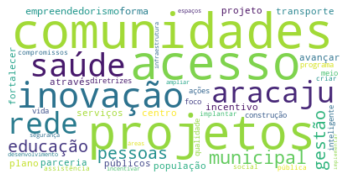

In [103]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if len(sentences_tfidf_no_zero_dictionary) > 0:
  words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_tfidf_no_zero_dictionary)

  plt.imshow(words_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
else:
  print("Sem palavras com TF-IDF diferente de zero")